# Import plaintext

In [137]:
import csv
import numpy as np
pt = []

with open('../Downloads/aes_32_4k_ckey/sim/custom_aes_vectors/aes_32_4k_ckey.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        pt.append(row['input'])
        #print(row['input'], row['output'])

In [138]:
pt_array = []
for i in range (len(pt)):
    b = bytes.fromhex(pt[i])
    one_array = np.frombuffer(b,dtype=np.uint8)
    pt_array.append(one_array)
print(len(pt_array))
print(len(pt_array[0]))
pt_array[0]

4094
4


array([146,  16, 115, 252], dtype=uint8)

# Import key

In [139]:
import csv
import numpy as np
key = []
with open('../Downloads/aes_32_4k_ckey/sim/custom_aes_vectors/aes_32_4k_ckey.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        key = row['key']

In [140]:
key

'45679abc'

In [141]:
key_array = []
b = bytes.fromhex(key)
one_array = np.frombuffer(b,dtype=np.uint8)
key_array = one_array
#key_array.append(one_array)
key_array

array([ 69, 103, 154, 188], dtype=uint8)

# Import traces

In [142]:
import glob
import matplotlib.pylab as plt
NumofTraces = len(pt_array)
stry = []
floaty = []
b = 0
path = "../Downloads/aes_32_4k_ckey/joules/reports/reports_aes_32_sky130_100/gate/*.data"
for filename in sorted(glob.glob(path, recursive=True),key = lambda x: x[-28:]):
    #print(filename)
    with open(filename, 'r') as f:
        next(f)
        for a,line in enumerate(f):
            row = line.split()
            if row:
                stry.append(row[-1])

for i in range (len(stry)):
    floaty.append(float(stry[i]))
floaty = np.hstack(floaty)
trace_array_y = np.array_split(floaty, NumofTraces)

print(len(trace_array_y))
print(len(trace_array_y[0]))
print(len(trace_array_y[4000]))

## missing trace 352 and 2910

4094
600
600


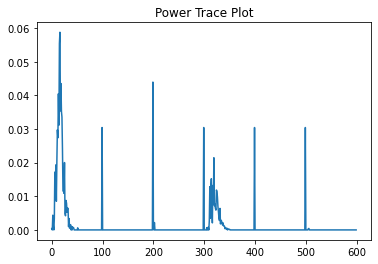

In [143]:
plt.plot(trace_array_y[0])
plt.title('Power Trace Plot')
plt.savefig('traces.jpg',dpi=300)
#plt.plot(trace_array_y[1])

In [144]:
trace_array_y = np.array(trace_array_y)

In [145]:
print(len(pt_array))
print(len(pt_array[0]))
print(len(key_array))
print(len(trace_array_y))
print(len(trace_array_y[8]))

4094
4
4
4094
600


In [10]:
for i in range (len(trace_array_y)):
    print(i)
    print(len(trace_array_y[i]))

0
600
1
600
2
600
3
600
4
600
5
600
6
600
7
600
8
600
9
600
10
600
11
600
12
600
13
600
14
600
15
600
16
600
17
600
18
600
19
600
20
600
21
600
22
600
23
600
24
600
25
600
26
600
27
600
28
600
29
600
30
600
31
600
32
600
33
600
34
600
35
600
36
600
37
600
38
600
39
600
40
600
41
600
42
600
43
600
44
600
45
600
46
600
47
600
48
600
49
600
50
600
51
600
52
600
53
600
54
600
55
600
56
600
57
600
58
600
59
600
60
600
61
600
62
600
63
600
64
600
65
600
66
600
67
600
68
600
69
600
70
600
71
600
72
600
73
600
74
600
75
600
76
600
77
600
78
600
79
600
80
600
81
600
82
600
83
600
84
600
85
600
86
600
87
600
88
600
89
600
90
600
91
600
92
600
93
600
94
600
95
600
96
600
97
600
98
600
99
600
100
600
101
600
102
600
103
600
104
600
105
600
106
600
107
600
108
600
109
600
110
600
111
600
112
600
113
600
114
600
115
600
116
600
117
600
118
600
119
600
120
600
121
600
122
600
123
600
124
600
125
600
126
600
127
600
128
600
129
600
130
600
131
600
132
600
133
600
134
600
135
600
136
600
137
600
138
60

1907
600
1908
600
1909
600
1910
600
1911
600
1912
600
1913
600
1914
600
1915
600
1916
600
1917
600
1918
600
1919
600
1920
600
1921
600
1922
600
1923
600
1924
600
1925
600
1926
600
1927
600
1928
600
1929
600
1930
600
1931
600
1932
600
1933
600
1934
600
1935
600
1936
600
1937
600
1938
600
1939
600
1940
600
1941
600
1942
600
1943
600
1944
600
1945
600
1946
600
1947
600
1948
600
1949
600
1950
600
1951
600
1952
600
1953
600
1954
600
1955
600
1956
600
1957
600
1958
600
1959
600
1960
600
1961
600
1962
600
1963
600
1964
600
1965
600
1966
600
1967
600
1968
600
1969
600
1970
600
1971
600
1972
600
1973
600
1974
600
1975
600
1976
600
1977
600
1978
600
1979
600
1980
600
1981
600
1982
600
1983
600
1984
600
1985
600
1986
600
1987
600
1988
600
1989
600
1990
600
1991
600
1992
600
1993
600
1994
600
1995
600
1996
600
1997
600
1998
600
1999
600
2000
600
2001
600
2002
600
2003
600
2004
600
2005
600
2006
600
2007
600
2008
600
2009
600
2010
600
2011
600
2012
600
2013
600
2014
600
2015
600
2016
600
2017
600
2

# SBox

In [146]:
sbox = (
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16)

def intermediate(pt, keyguess):
    return sbox[pt ^ keyguess]

HW = [bin(n).count("1") for n in range(0, 256)]

# CPA Attack -- Method 1

In [147]:
from tqdm.notebook import trange
numtraces = len(trace_array_y) #total number of traces
numpoint = len(trace_array_y[0]) #samples per trace

knownkey = key_array[0]

key_guess = []
full_cpa_list = []
known_key = key_array

for bnum in trange(0, 4):
    cpaoutput = [0] * 256
    maxcpa = [0] * 256
    for kguess in trange(0, 256):

        # Initialize arrays &amp; variables to zero
        sumnum = np.zeros(numpoint)
        sumden1 = np.zeros(numpoint)
        sumden2 = np.zeros(numpoint)
        
        hyp = np.zeros(numtraces)
        for tnum in range(0, numtraces):
            ####################################power model on sbox
            #st1 = pt_array[tnum][bnum] ^ kguess
            #st2 = sbox[st1]
            #hyp[tnum] = HW[st1 ^ st2]
            #hyp[tnum] = st1 ^ st2
            ####################################power model on sbox
            hyp[tnum] = HW[intermediate(pt_array[tnum][bnum], kguess)]
            #st1 = pt_array[tnum][bnum] ^ kguess
            #st2 = sbox[st1]
            #hyp[tnum] = HW[st1 ^ st2]
            #hyp[tnum] = st1 ^ st2
            
        # Mean of hypothesis
        meanh = np.mean(hyp, dtype=np.float64)

        # Mean of all points in trace
        meant = np.mean(trace_array_y, axis=0, dtype=np.float64)

        # For each trace, do the following
        for tnum in range(0, numtraces):
            hdiff = (hyp[tnum] - meanh)
            tdiff = trace_array_y[tnum, :] - meant

            sumnum = sumnum + (hdiff * tdiff)
            sumden1 = sumden1 + hdiff * hdiff
            sumden2 = sumden2 + tdiff * tdiff

        cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
        maxcpa[kguess] = max(abs(cpaoutput[kguess]))

    full_cpa_list.append(cpaoutput)
    #np.array(full_cpa_list[bnum]).tofile("new_cpa_byte%2d.bin" %(bnum))
    sorted_args = np.argsort(maxcpa)[::-1]
    key_guess.append(sorted_args[0])
    print("Subkey %2d - most likely %02X (actual %02X)"%(bnum, key_guess[bnum], known_key[bnum]))
    print(" Top 5 guesses: ")
    for i in range(0, 5):
        g = sorted_args[i]
        print("   %02X - Diff = %f"%(g, maxcpa[g]))
    print("\n")

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  0 - most likely 45 (actual 45)
 Top 5 guesses: 
   45 - Diff = 0.375315
   10 - Diff = 0.144474
   22 - Diff = 0.130397
   D7 - Diff = 0.130147
   91 - Diff = 0.125428




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  1 - most likely 67 (actual 67)
 Top 5 guesses: 
   67 - Diff = 0.342896
   F6 - Diff = 0.143803
   32 - Diff = 0.142563
   12 - Diff = 0.131665
   13 - Diff = 0.127806




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  2 - most likely 9A (actual 9A)
 Top 5 guesses: 
   9A - Diff = 0.369457
   41 - Diff = 0.132659
   C1 - Diff = 0.129830
   FB - Diff = 0.129037
   2C - Diff = 0.127589




  0%|          | 0/256 [00:00<?, ?it/s]

Subkey  3 - most likely BC (actual BC)
 Top 5 guesses: 
   BC - Diff = 0.375715
   38 - Diff = 0.131422
   F3 - Diff = 0.127657
   2D - Diff = 0.126342
   67 - Diff = 0.124948




<Figure size 432x288 with 0 Axes>

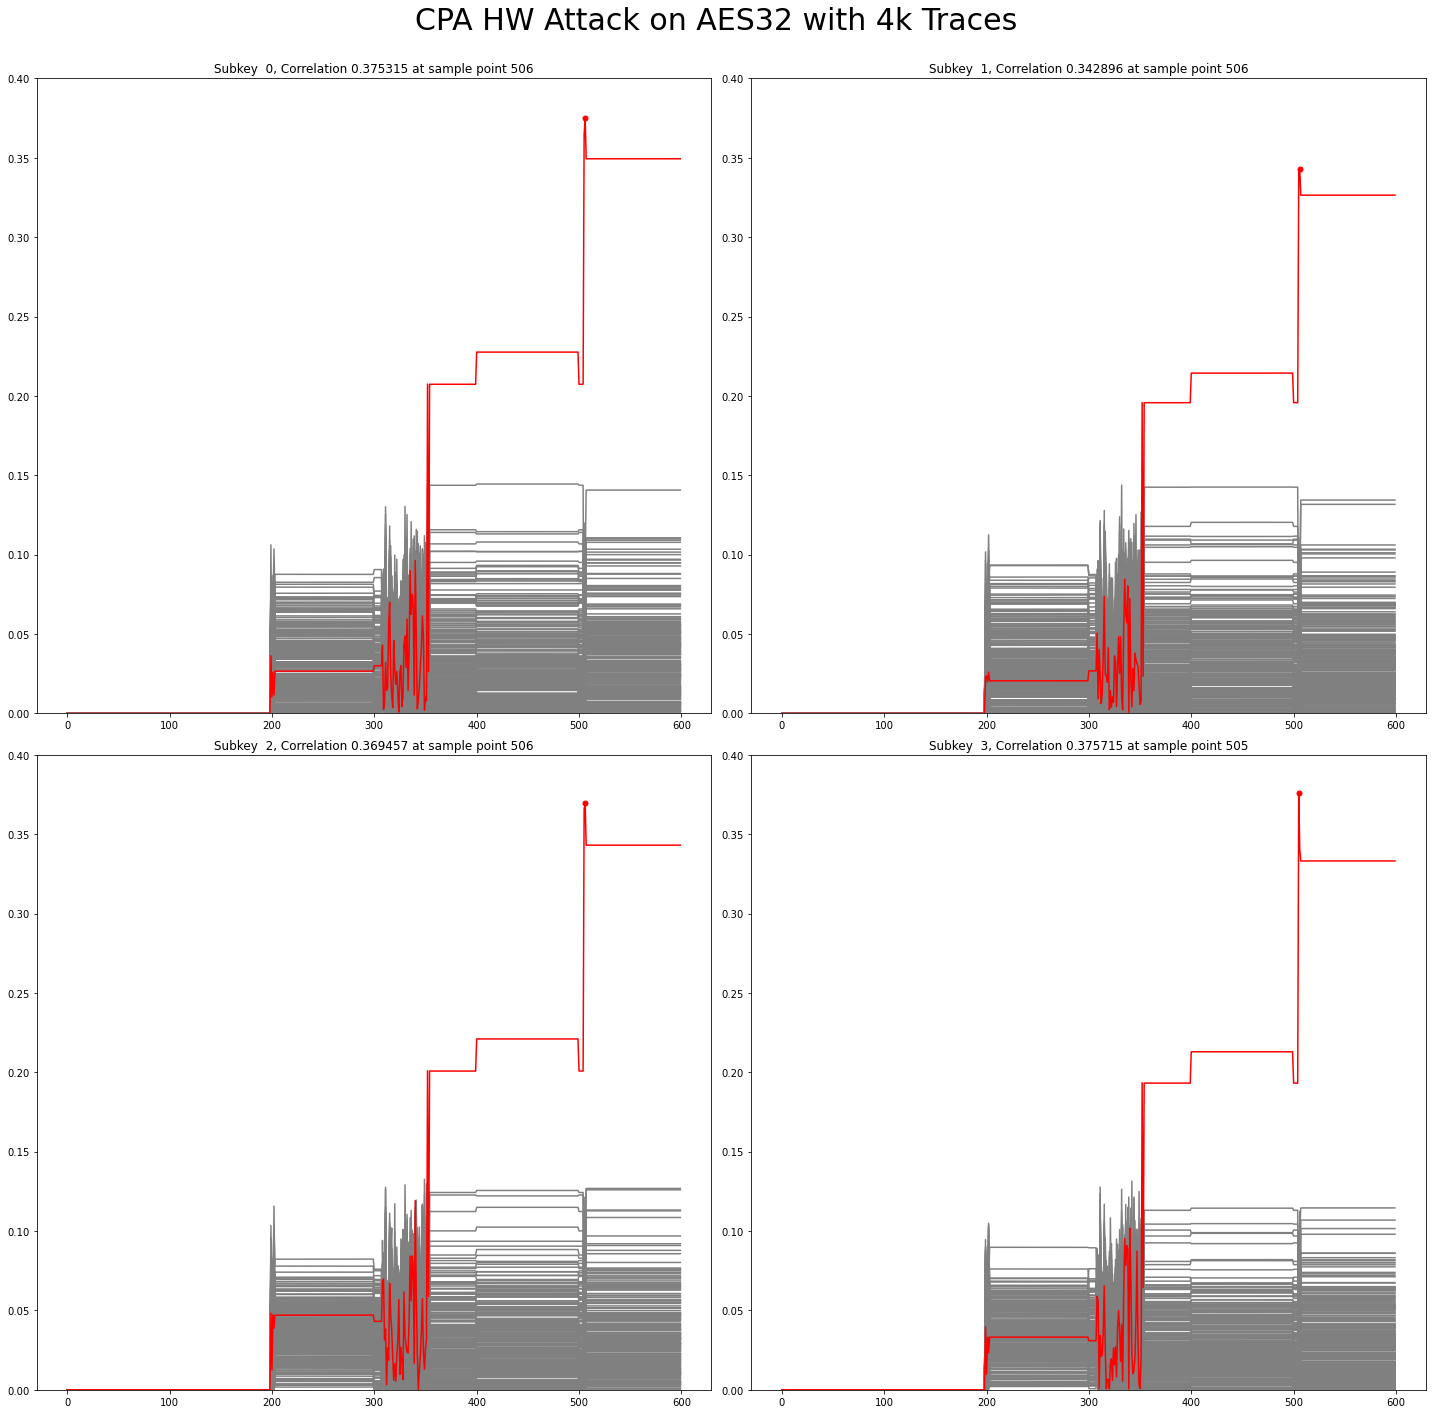

In [56]:
import pylab
plt.figure()
f, axs = plt.subplots(2,2,figsize=(20,20))
value = 1
for subkey in range (4):
    pylab.subplot(2,2,value)
    for guess in range(0, 256):
        if (guess == known_key[subkey]):
            plt.plot(abs(full_cpa_list[subkey][guess]),color="red",linewidth=1.5, linestyle='-',zorder=255)
        else:
            plt.plot(abs(full_cpa_list[subkey][guess]),color="grey")
    value += 1
    corr = abs(full_cpa_list[subkey][known_key[subkey]])
    xmax = np.argmax(corr)
    ymax = corr.max()
    plt.plot([xmax],[ymax],marker='.', markersize=10, color="red",zorder=255)
    plt.title('Subkey %2d, Correlation %2f at sample point %d' %(subkey,ymax,xmax))
    plt.ylim((0,0.4))
    
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.suptitle('CPA HW Attack on AES32 with 4k Traces', size=30)
plt.savefig('4k traces attack.jpg',dpi=300)

plt.show()

# How Many Traces Needed for Method 1

In [57]:
traces_enc_full = trace_array_y

In [58]:
len(traces_enc_full[0])

600

In [59]:
def num_same(a, b):
    
    if len(a) != len(b):
        raise ValueError("Arrays must be same length!")
    
    #Count how many list items match up
    same = 0
    for i, _ in enumerate(a):
        if a[i] == b[i]:
            same += 1
    
    return same

In [60]:
x = np.arange(500, 4000, 200)
x

array([ 500,  700,  900, 1100, 1300, 1500, 1700, 1900, 2100, 2300, 2500,
       2700, 2900, 3100, 3300, 3500, 3700, 3900])

In [113]:
full_cpa_list = []

key_full_guess = []

how_many_correct_keybytes = []
is_same = 0

traces_enc = []
pt = []

known_key = key_array

for traces in trange(10, 1000, 50):
    x = np.arange(10, 1000, 50)
    
    traces_enc = np.array(traces_enc_full[0:traces])
    pt = np.array(pt_array[0:traces])
    
    numtraces = len(traces_enc) 
    numpoint = len(traces_enc[0]) 
    
    key_guess = []
    cpa_list = []
    for bnum in trange(0, 4):
        
        cpaoutput = [0] * 256
        maxcpa = [0] * 256
        
        for kguess in range(0, 256):

        # Initialize arrays &amp; variables to zero
            sumnum = np.zeros(numpoint)
            sumden1 = np.zeros(numpoint)
            sumden2 = np.zeros(numpoint)
        
            hyp = np.zeros(numtraces)
            for tnum in range(0, numtraces):
                #st1 = pt_array[tnum][bnum] ^ kguess
                #st2 = sbox[st1]
                #hyp[tnum] = HW[st1 ^ st2]
                #hyp[tnum] = st1 ^ st2
                hyp[tnum] = HW[intermediate(pt_array[tnum][bnum], kguess)]
                

            # Mean of hypothesis
            meanh = np.mean(hyp, dtype=np.float64)

            # Mean of all points in trace
            meant = np.mean(traces_enc, axis=0, dtype=np.float64)

            # For each trace, do the following
            for tnum in range(0, numtraces):
                hdiff = (hyp[tnum] - meanh)
                tdiff = traces_enc[tnum, :] - meant

                sumnum = sumnum + (hdiff * tdiff)
                sumden1 = sumden1 + hdiff * hdiff
                sumden2 = sumden2 + tdiff * tdiff

            cpaoutput[kguess] = sumnum / np.sqrt(sumden1 * sumden2)
            maxcpa[kguess] = max(abs(cpaoutput[kguess]))

        cpa_list.append(cpaoutput)
        sorted_args = np.argsort(maxcpa)[::-1]
        key_guess.append(sorted_args[0])

    full_cpa_list.append(cpa_list)
    key_full_guess.append(key_guess)
    is_same = num_same(key_guess,known_key)
    how_many_correct_keybytes.append(is_same)
    
    print("For %2d traces, correct key byte are %2d" %(traces,is_same))
    print("\n")

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/4 [00:00<?, ?it/s]

For 10 traces, correct key byte are  0




  0%|          | 0/4 [00:00<?, ?it/s]

For 60 traces, correct key byte are  2




  0%|          | 0/4 [00:00<?, ?it/s]

For 110 traces, correct key byte are  2




  0%|          | 0/4 [00:00<?, ?it/s]

For 160 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 210 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 260 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 310 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 360 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 410 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 460 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 510 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 560 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 610 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 660 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 710 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 760 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 810 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 860 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 910 traces, correct key byte are  4




  0%|          | 0/4 [00:00<?, ?it/s]

For 960 traces, correct key byte are  4




# CPA Number of traces vs. correctly guessed key bytes

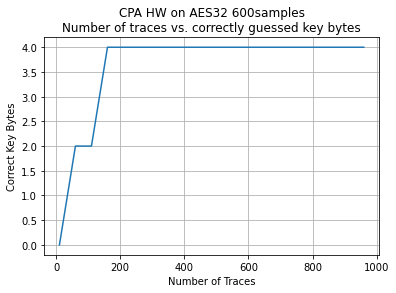

In [114]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt

plt.plot(x, how_many_correct_keybytes)
plt.grid()
plt.xlabel('Number of Traces')
plt.ylabel('Correct Key Bytes')
plt.title('CPA HW on AES32 600samples\nNumber of traces vs. correctly guessed key bytes')
plt.savefig('200s_correct_bytes_vs_traces.jpg',dpi=100) # save jpg/png

In [115]:
### take the max correct 16 subkeys out of the 45 experienments 
### so it is a 45x16x1 matrix for the correct key guess 1/256
### 45x16x255 matrix for the rest of the guesses keybyte

correct_full_list = []  #45x16x1
else_full_list = []  #45x16x255

for i in range (len(how_many_correct_keybytes)):
    correct_16_subbyte_list = []  #16x1
    else_16_subbyte_list = []  #16x255
    
    for subkey in range (4):
        max_correct = []  #1
        max_else = []  #255
        
        for guess in range(0, 256):  #take the max correlation of the correct key guess 
            if (guess == known_key[subkey]):
                ### edit below -- the list name need to be change for the especific name 
                corr = abs(full_cpa_list[i][subkey][guess])
                ### edit above -- the list name need to be change for the especific name 
                #ymax = corr.max()   
                ymax = max(corr)
                max_correct.append(ymax)
            else:
                corr = abs(full_cpa_list[i][subkey][guess])
                ymax = max(corr)
                max_else.append(ymax)
                
        correct_16_subbyte_list.append(max_correct)
        
        else_16_subbyte_list.append(max_else)
        
    correct_full_list.append(correct_16_subbyte_list)
    
    else_full_list.append(else_16_subbyte_list)

print(len(correct_full_list))
print(len(correct_full_list[0]))
print(len(correct_full_list[0][0]))
print(len(else_full_list))
print(len(else_full_list[0]))
print(len(else_full_list[0][0]))

20
4
1
20
4
255


In [116]:
### make the correct key correlation to 16x45x1 matrix

corr_plot_full = []
for i in range (4):
    corr_plot = []
    for j in range (len(how_many_correct_keybytes)):
        corr_plot.append(correct_full_list[j][i])  ## invert the i and j 
    corr_plot_full.append(corr_plot)

In [117]:
### make the else key correlation to 16x255x45 matrix

else_16 = []
for i in range (4):
    else_255 = []
    for j in range (len(else_full_list[0][0])):
        else_list = []
        for k in range (len(how_many_correct_keybytes)):
            else_list.append(else_full_list[k][i][j])  ## invert the i, j and k 
        else_255.append(else_list)
    else_16.append(else_255)

<Figure size 432x288 with 0 Axes>

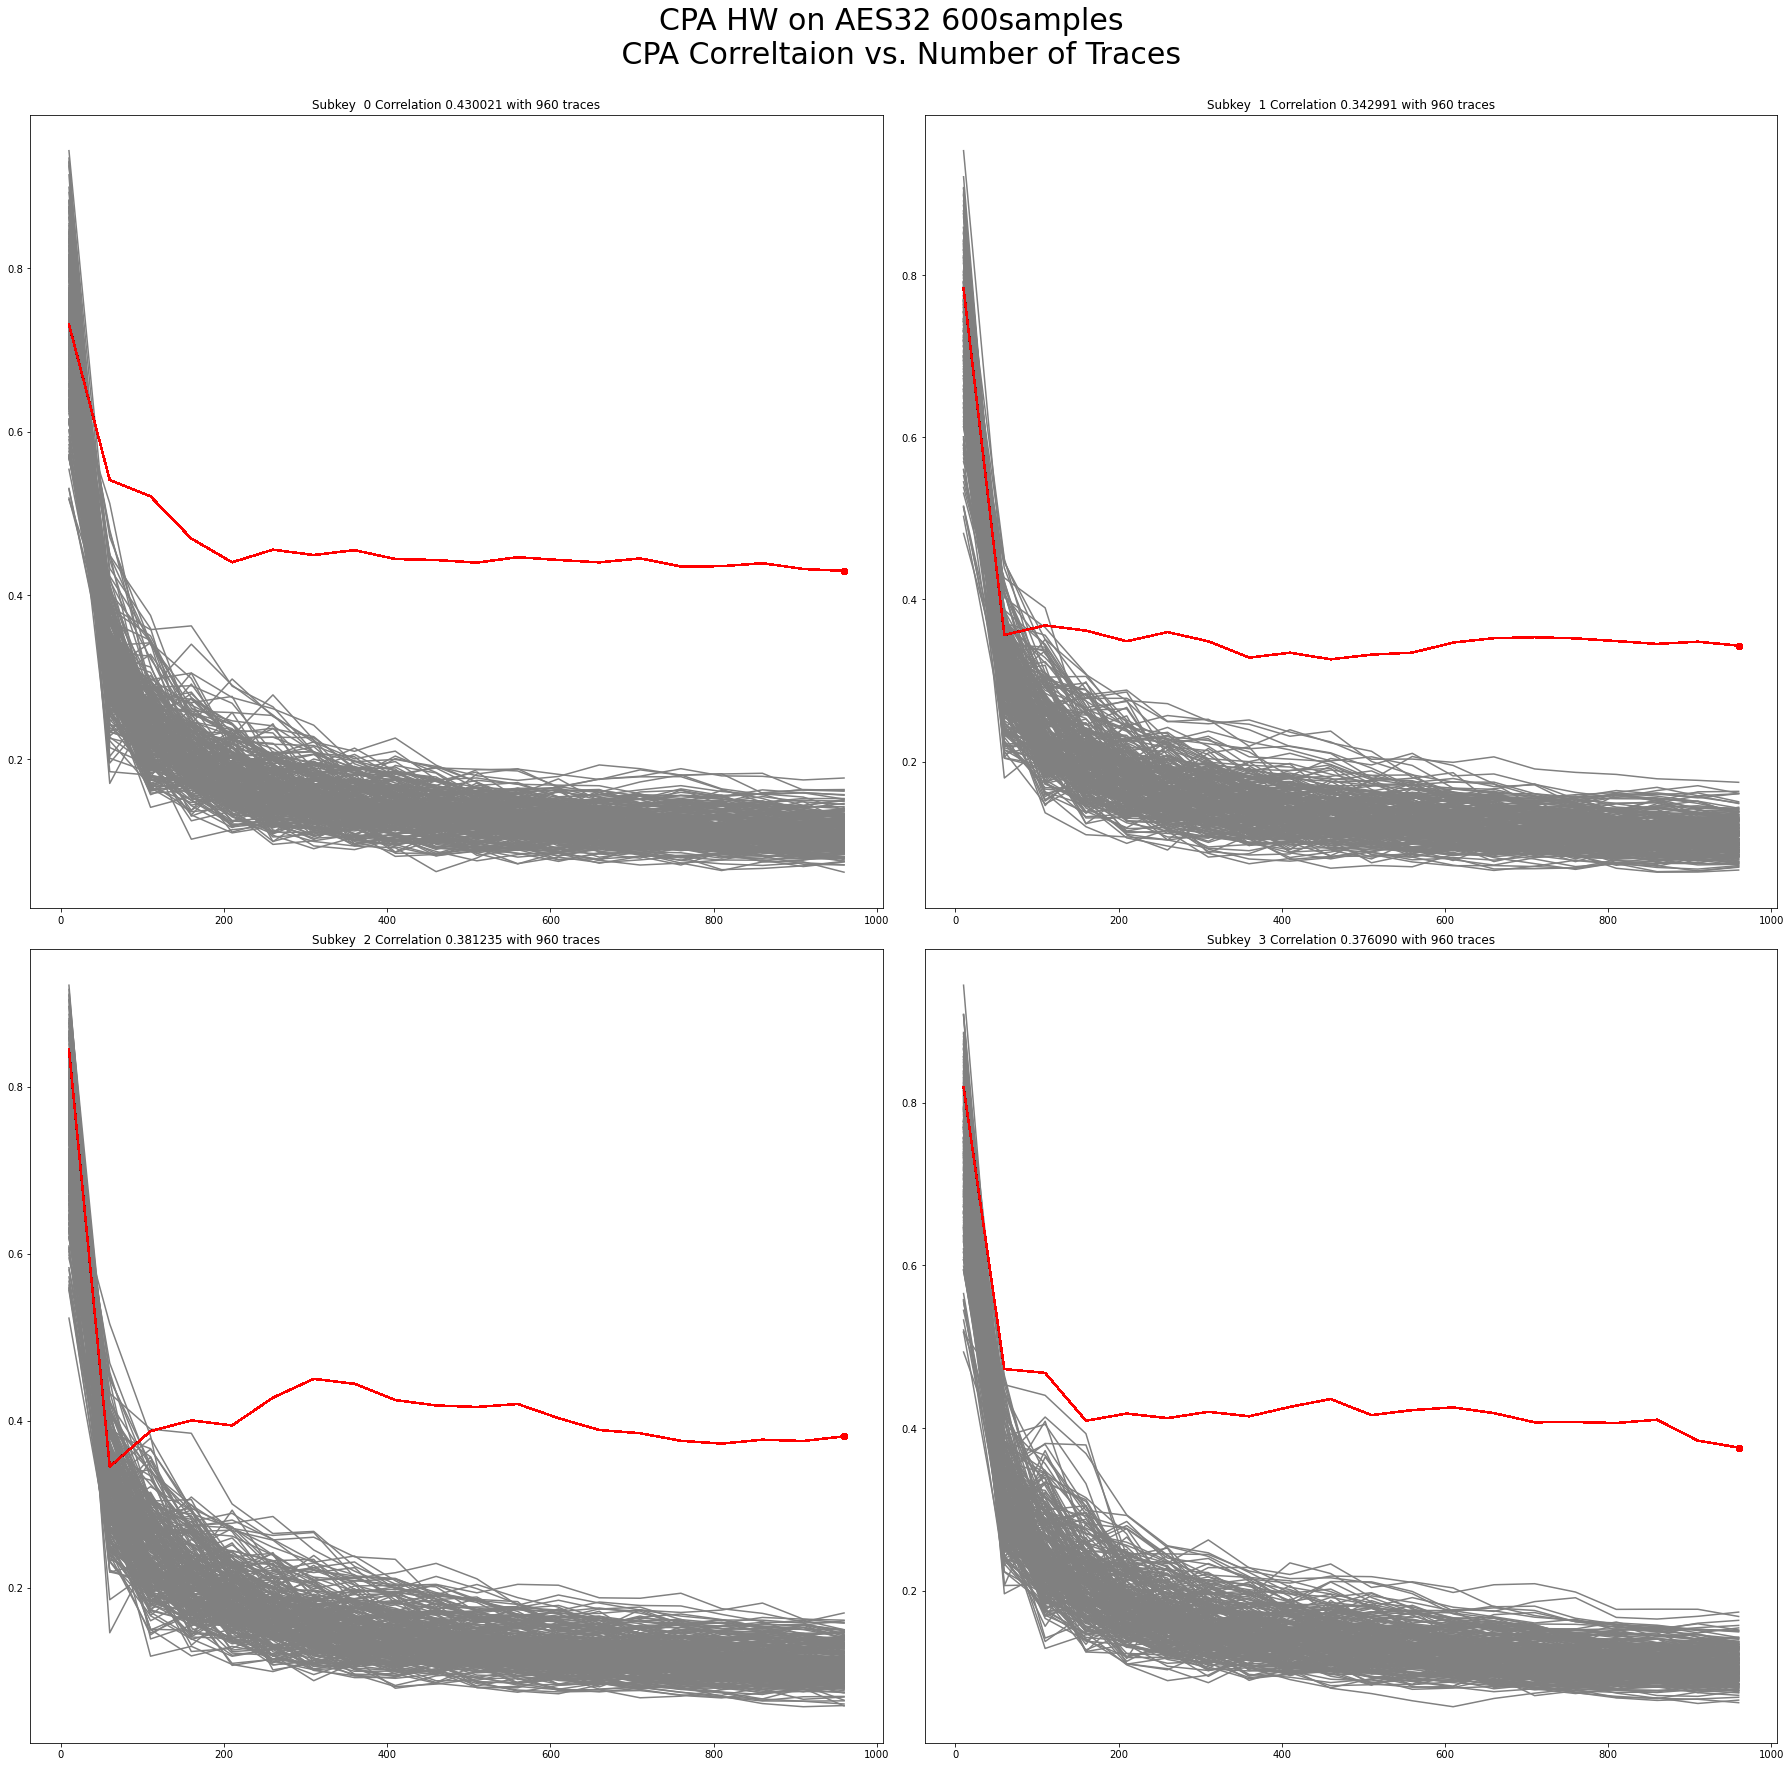

In [121]:
### plot a 16 subplot, 16 subkeys
### each subkeys has 255 guesses 
### each guesses has 45 points in this experienment

import pylab

import warnings  #ignore the subplot warmings of pylab.subplot(4,4,subkey+1)
warnings.filterwarnings('ignore')

plt.figure()

f, axs = plt.subplots(2,2,figsize=(25,25))  #making a 4x4 subplot, figsize 25x25

for subkey in range (4):
    for guess in range (len(else_16[0])):
        pylab.subplot(2,2,subkey+1)  # marking the position of each subplot
        
        y = else_16[subkey][guess]  #plotting the 255 guesses
        plt.plot(x,y,color='grey')  #set wrong guesses as grey
        y1 = corr_plot_full[subkey]  #plotting the correct 1 guesses
        plt.plot(x,y1,color='red',linewidth=1.5, linestyle='-',zorder=255)  #set correct guesses as red
        
        last = len(x)-1
        val = corr_plot_full[subkey][last][0]
        plt.plot(x[last],val,marker='.', markersize=10, color="red",zorder=255)
        
        plt.title('Subkey %2d Correlation %2f with %2d traces' %(subkey,val,x[last]))
        
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.suptitle('CPA HW on AES32 600samples \n CPA Correltaion vs. Number of Traces', size=30)

plt.savefig('s.jpg',dpi=300)  
            
plt.show()